<a href="https://colab.research.google.com/github/kothale/bharatIntern/blob/main/stockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import figure
from tensorflow import keras
import math as mt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# read csv

In [ ]:
path = "/content/drive/MyDrive/AAPL.csv"
data = pd.read_csv(path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-1990,0.314732,0.334821,0.312500,0.332589,0.266423,183198400
1,03-01-1990,0.339286,0.339286,0.334821,0.334821,0.268211,207995200
2,04-01-1990,0.341518,0.345982,0.332589,0.335938,0.269106,221513600
3,05-01-1990,0.337054,0.341518,0.330357,0.337054,0.270000,123312000
4,08-01-1990,0.334821,0.339286,0.330357,0.339286,0.271788,101572800


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8042 entries, 0 to 8041
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8042 non-null   object 
 1   Open       8042 non-null   float64
 2   High       8042 non-null   float64
 3   Low        8042 non-null   float64
 4   Close      8042 non-null   float64
 5   Adj Close  8042 non-null   float64
 6   Volume     8042 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 439.9+ KB


In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8.042000e+03
mean,16.351917,16.525066,16.178668,16.358983,15.594377,3.831832e+08
std,29.698129,30.021799,29.380971,29.717860,29.448485,3.633095e+08
min,0.114955,0.118304,0.113839,0.115513,0.099037,2.396800e+06
25%,0.367266,0.375000,0.358929,0.367188,0.308924,1.478439e+08
50%,2.111071,2.138393,2.058393,2.106428,1.805978,2.664242e+08
75%,21.204196,21.363661,20.989554,21.170268,18.389792,4.808804e+08
max,161.679993,165.699997,161.000000,165.300003,165.300003,7.421641e+09


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

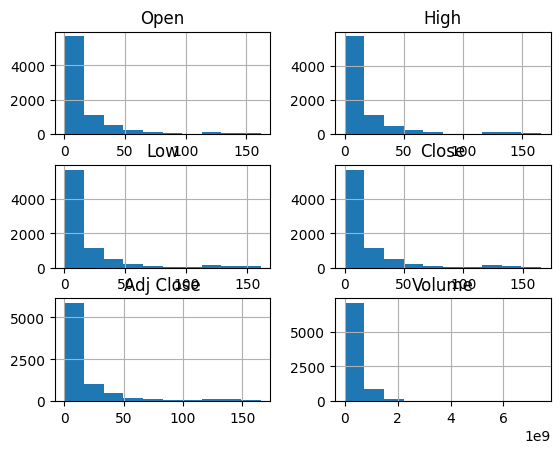

In [ ]:
data.hist()

In [ ]:
srt = data.sort_values(by = 'Date')
srt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
22,01-02-1990,0.308036,0.309152,0.299107,0.300223,0.240496,117073600
275,01-02-1991,0.495536,0.516741,0.495536,0.497768,0.403693,444550400
780,01-02-1993,0.529018,0.546875,0.529018,0.546875,0.451576,240553600
1034,01-02-1994,0.294643,0.299107,0.287946,0.296875,0.248161,156721600
1286,01-02-1995,0.363839,0.363839,0.356027,0.358259,0.303692,158368000


In [ ]:
srt.reset_index(inplace=True)

In [ ]:
srt.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,22,01-02-1990,0.308036,0.309152,0.299107,0.300223,0.240496,117073600
1,275,01-02-1991,0.495536,0.516741,0.495536,0.497768,0.403693,444550400
2,780,01-02-1993,0.529018,0.546875,0.529018,0.546875,0.451576,240553600
3,1034,01-02-1994,0.294643,0.299107,0.287946,0.296875,0.248161,156721600
4,1286,01-02-1995,0.363839,0.363839,0.356027,0.358259,0.303692,158368000


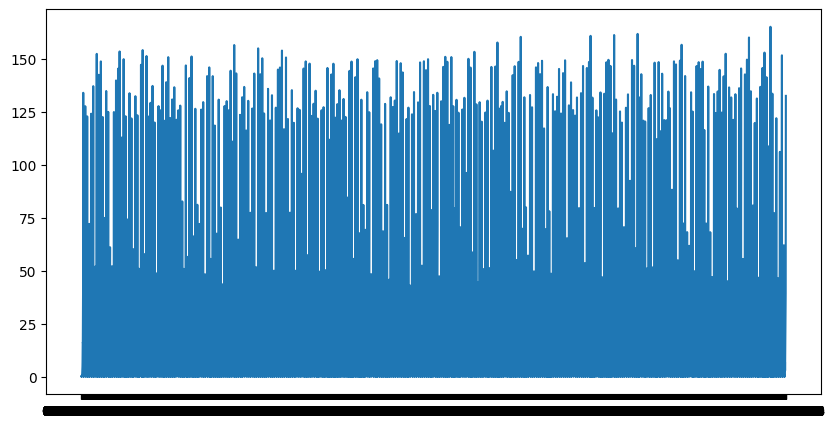

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(srt['Date'],srt['Close'])

In [ ]:
close_srt = srt['Close']
scaler = MinMaxScaler(feature_range=(0,1))
close_srt = scaler.fit_transform(np.array(close_srt).reshape(-1,1))
close_srt

array([[0.0011182 ],
       [0.00231411],
       [0.0026114 ],
       ...,
       [0.23803378],
       [0.44372801],
       [0.80258436]])

In [ ]:
train_size = int(len(close_srt)*0.7)
test_size = len(close_srt) - train_size
train_data,test_data = close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]

In [ ]:
def create_dataset(dataset,time_step=1):
  dataX,dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
78/78 [==============================] - 28s 267ms/step - loss: 0.0263 - val_loss: 0.0231
Epoch 2/60
78/78 [==============================] - 16s 204ms/step - loss: 0.0209 - val_loss: 0.0187
Epoch 3/60
78/78 [==============================] - 16s 209ms/step - loss: 0.0178 - val_loss: 0.0156
Epoch 4/60
78/78 [==============================] - 16s 206ms/step - loss: 0.0175 - val_loss: 0.0156
Epoch 5/60
78/78 [==============================] - 16s 206ms/step - loss: 0.0151 - val_loss: 0.0127
Epoch 6/60
78/78 [==============================] - 17s 218ms/step - loss: 0.0124 - val_loss: 0.0139
Epoch 7/60
78/78 [==============================] - 20s 246ms/step - loss: 0.0126 - val_loss: 0.0132
Epoch 8/60
78/78 [==============================] - 16s 205ms/step - loss: 0.0127 - val_loss: 0.0121
Epoch 9/60
78/78 [==============================] - 16s 208ms/step - loss: 0.0108 - val_loss: 0.0119
Epoch 10/60
78/78 [==============================] - 16s 207ms/step - loss: 0.0110 - val_lo

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


73/73 [==============================] - 5s 69ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
mt.sqrt(mean_squared_error(y_train,train_predict))

4750.302553426027

In [ ]:
mt.sqrt(mean_squared_error(y_test,test_predict))

4675.794585055965

**prediction vs** **actual**

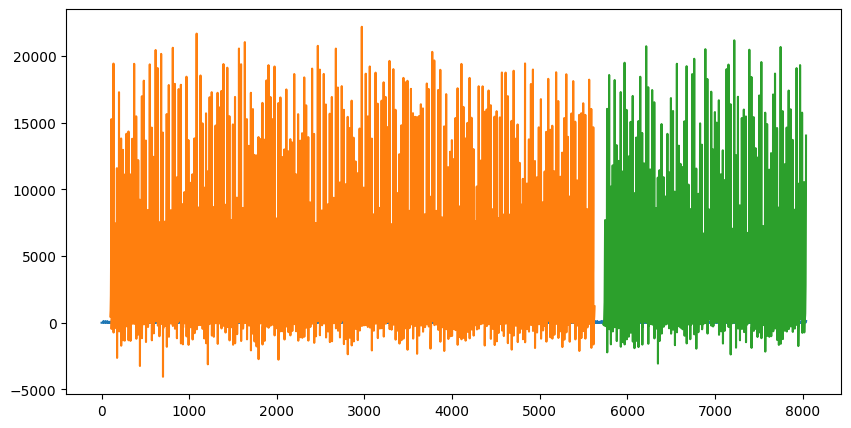

In [ ]:
look_back=100

trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]= train_predict

testPredictPlot = np.empty_like(close_srt)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1,:] = test_predict

plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()